# PCA

## Steps involved in PCA


*   Step 1: Center the dataset

*   Step 2: Calculate the covariance matrix of the centered data

*   Step 3: Compute the eigenvectors and eigenvalues

*   Step 4: Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues

*   Step 5: Transform the original data by multiplying it with the selected eigenvectors(PCs) to obtain a lower-dimensional representation.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([(4,1),(5,4),(6,3),(7,4),(2,-1),(-1,-2),(0,-3),(-1,-4)]).T

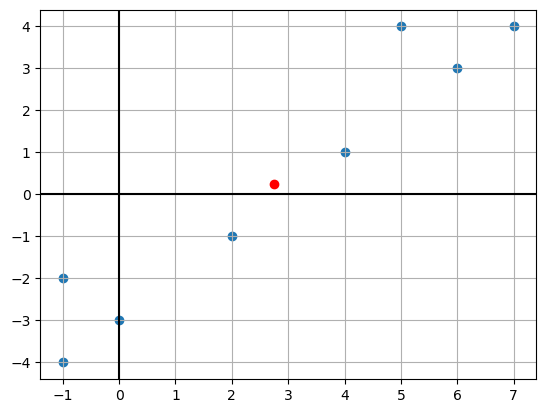

In [6]:
plt.scatter(X[0,:],X[1,:])
plt.axhline(0,color='k')
plt.axvline(0,color='k')
x_mean=X.mean(axis=1)
plt.scatter(x_mean[0],x_mean[1],color='r')
plt.grid()
plt.show()

In [8]:
def center(X):
    return X - X.mean(axis=1).reshape(-1,1)
d,n=X.shape
X_centered=center(X)

In [12]:
X_centered # X here is a d x n matrix

array([[ 1.25,  2.25,  3.25,  4.25, -0.75, -3.75, -2.75, -3.75],
       [ 0.75,  3.75,  2.75,  3.75, -1.25, -2.25, -3.25, -4.25]])


The covariance matrix is given by
$\mathbf{C} \ =\ \frac{1}{n}\sum \limits_{i\ =\ 1}^{n} \mathbf {x}_{i}\mathbf {x}_{i}^{T} \ =\ \frac{1}{n}\mathbf{XX}^{T}$

In [13]:
def covariance(X):
    return X@X.T/ X.shape[1] # because X here is a d  x n matrix
C=covariance(X_centered)
C
    
    

array([[8.9375, 8.5625],
       [8.5625, 8.9375]])

## Compute the principal components

The $k^{th}$ principal component is given by the eigenvector corresponding to the $k^{th}$ largest eigenvalue

In [15]:
def compute_pc(C):
    
    eigval,eigvec=np.linalg.eigh(C)
    w_1,w_2=eigvec[:,-1],eigvec[:,-2]
    return w_1,w_2

w_1,w_2=compute_pc(C)
w_1

array([0.70710678, 0.70710678])

## Reconstruction using the two PCs
The scalar projection of the dataset on $k^{th}$ PC is given by $ \mathbf{X}_{\text{centered}}^{T} \ .\ \mathbf{w_{k}}$

The vector projection of the dataset on $k^{th}$ PC is given by $\mathbf{w_{k} .(\mathbf{X}_{\text{centered}}^{T} \ .\ \mathbf{w_{k}})^{T}}$


In [16]:
w_1 = w_1.reshape(w_1.shape[0],1)
w_2 = w_2.reshape(w_2.shape[0],1)
w_1 @ (X_centered.T @ w_1).reshape(1,n) + w_2 @ (X_centered.T @ w_2).reshape(1,n)

array([[ 1.25,  2.25,  3.25,  4.25, -0.75, -3.75, -2.75, -3.75],
       [ 0.75,  3.75,  2.75,  3.75, -1.25, -2.25, -3.25, -4.25]])

Imp : summing up the projections on PCs should give us back the original centered dataset
x=(x^T*w_1)w_1 + ....(x^T*w_d)w_d

In [17]:
#The reconstruction error by the first PC is given by
X_1 = np.array((1.25,0.75))
p_1 = X_centered[:,0]

#Let the reconstruction of the first point using first PC be given by
p_2 = w_1 @ (X_1 @ w_1)
print("The reconstruction error with first PC is "+ str(np.sum(np.square(p_1 - p_2))))

The reconstruction error with first PC is 0.125


In [18]:
#Reconstruction error for each point when considering the first principal component
rec_error_1 = np.square(np.linalg.norm(X_centered[:,] - (w_1 @ (X_centered.T @ w_1).reshape(1,n))[:,], axis=0))
print(rec_error_1)

[0.125 1.125 0.125 0.125 0.125 1.125 0.125 0.125]


In [19]:
#Total reconstruction error when considering first principal component

print("The reconstruction error along the first principal component is "+str(np.round((rec_error_1).mean(),4)))

The reconstruction error along the first principal component is 0.375


In [21]:
#Reconstruction error for each point when considering the vector w_r
w_r = np.array([0,1]).reshape(-1,1)
rec_error_r = np.square(np.linalg.norm(X_centered[:,] - (w_r @ (X_centered.T @ w_r).reshape(1,n))[:,], axis=0))
print(rec_error_r)

[ 1.5625  5.0625 10.5625 18.0625  0.5625 14.0625  7.5625 14.0625]


In [22]:
print("The reconstruction error along w_r is "+str((rec_error_r).mean()))

The reconstruction error along w_r is 8.9375


In [23]:
# Optimal k
eigval, eigvec = np.linalg.eigh(C)
eigval = eigval[::-1]
def var_thresh(k):
  tot_var = 0
  req_var = 0
  for x in eigval:
    tot_var += x
  for y in range(k):
    req_var += eigval[y]

  return (req_var/tot_var)

for i in range(d+1):
  print("The explained variance when K is "+str(i)+" is "+str(np.round(var_thresh(i),4)))

The explained variance when K is 0 is 0.0
The explained variance when K is 1 is 0.979
The explained variance when K is 2 is 1.0
